In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.externals import joblib

# Choose GBDT Regression model as baseline
# my_model = GradientBoostingRegressor()

In [16]:
station='awt'

In [17]:
train_data = pd.read_csv('train-dataset/point_date_' + station + '.csv')
train_data_Y = train_data['actualPowerGeneration']

# Drop some non-relative factors
drop_columns = ['longitude', 'latitude', 'RadiationHorizontalPlane', 'Temperature', 'actualPowerGeneration',
                'Humidity', 'atmosphericPressure', 'windDirection', 'scatteredRadiation']
train_data_X = train_data.drop(axis=1, columns=drop_columns)

train_data_X['month'] = pd.to_datetime(train_data_X.Time).dt.month
train_data_X['day'] = pd.to_datetime(train_data_X.Time).dt.day
train_data_X['hour'] = pd.to_datetime(train_data_X.Time).dt.hour


# Validation
X_train, X_test, Y_train, Y_test = train_test_split(train_data_X, train_data_Y, test_size=0.2, random_state=40)
X_train_wt = X_train.drop(axis=1, columns=['Time'])
X_test_wt = X_test.drop(axis=1, columns=['Time'])
myGBR = GradientBoostingRegressor(n_estimators=500,max_depth=7)
myGBR.fit(X_train_wt, Y_train)
Y_ctest = myGBR.predict(X_test_wt)
Y_ctrain = myGBR.predict(X_train_wt)

In [18]:
print('Training completed. MSE on train set is {}'.format(mean_squared_error(Y_ctrain, Y_train)))
print('Training completed. MSE on validation set is {}'.format(mean_squared_error(Y_ctest, Y_test)))
print('Factors below are used: \n{}'.format(list(X_train_wt.columns)))

Training completed. MSE on train set is 0.8738761919432442
Training completed. MSE on validation set is 1.2900779347158735
Factors below are used: 
['windSpeed', 'RadiationInclinedPlane', 'directRadiation', 'month', 'day', 'hour']


In [19]:
Train_show_Y = pd.Series(Y_train,name='actualPowerGeneration',index=X_train.index)
Train_show_X=X_train
Train_show_cY = pd.Series(Y_ctrain,name='predictPowerGeneration',index=X_train.index)

Test_show_Y = pd.Series(Y_test,name='actualPowerGeneration',index=X_test.index)
Test_show_X=X_test
Test_show_cY = pd.Series(Y_ctest,name='predictPowerGeneration',index=X_test.index)


In [20]:
Train_show=pd.concat((Train_show_X,Train_show_Y,Train_show_cY),axis=1)
Test_show=pd.concat((Test_show_X,Test_show_Y,Test_show_cY),axis=1)

In [21]:
Train_show=Train_show.sort_values(by='Time')
Test_show=Test_show.sort_values(by='Time')

In [22]:
import matplotlib.pyplot as plt

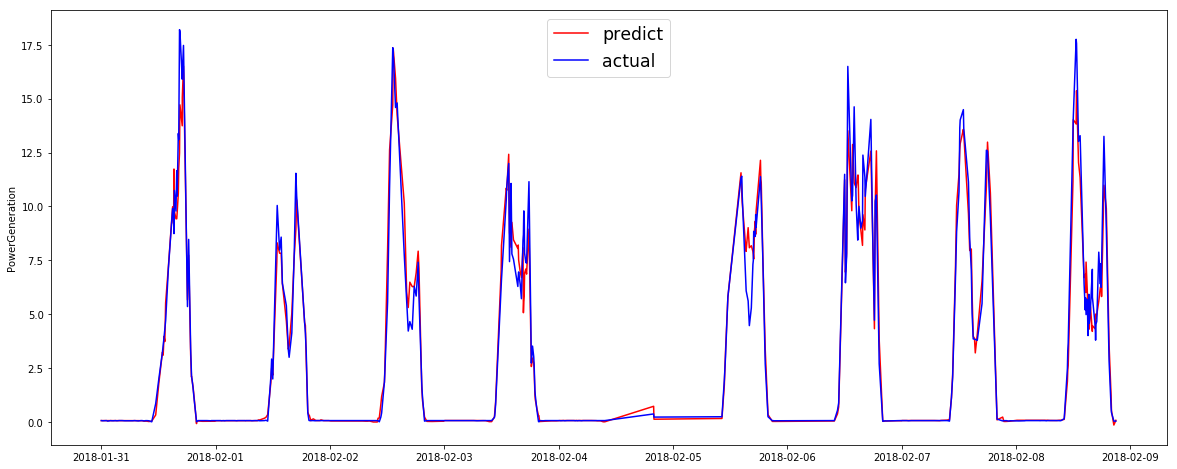

In [31]:
Test_show['Time']=pd.to_datetime(Test_show['Time'])

plt.figure(figsize=(20,8))
plt.plot(Test_show['Time'][:500].values,Test_show['predictPowerGeneration'][:500].apply(lambda x: x).values,c='r',label='predict')
plt.plot(Test_show['Time'][:500].values,Test_show['actualPowerGeneration'][:500].values,c='b',label='actual')
plt.ylabel('PowerGeneration')
plt.legend(fontsize = 'xx-large',loc = 'best')
plt.show()

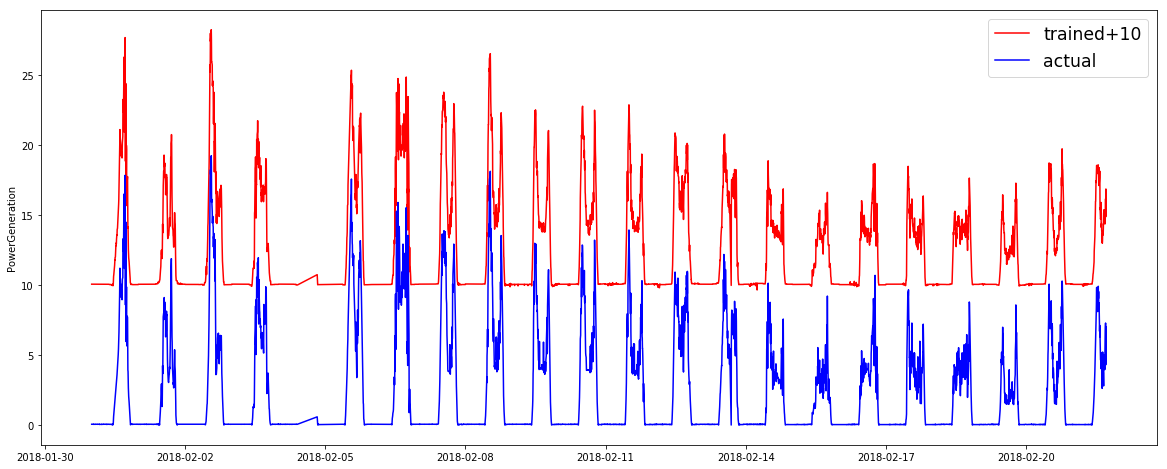

In [33]:
Train_show['Time']=pd.to_datetime(Train_show['Time'])

plt.figure(figsize=(20,8))
plt.plot(Train_show['Time'][:5000].values,Train_show['predictPowerGeneration'][:5000].apply(lambda x: x+10).values,c='r',label='trained+10')
plt.plot(Train_show['Time'][:5000].values,Train_show['actualPowerGeneration'][:5000].values,c='b',label='actual')
plt.ylabel('PowerGeneration')
plt.legend(fontsize = 'xx-large',loc = 'best')
plt.show()

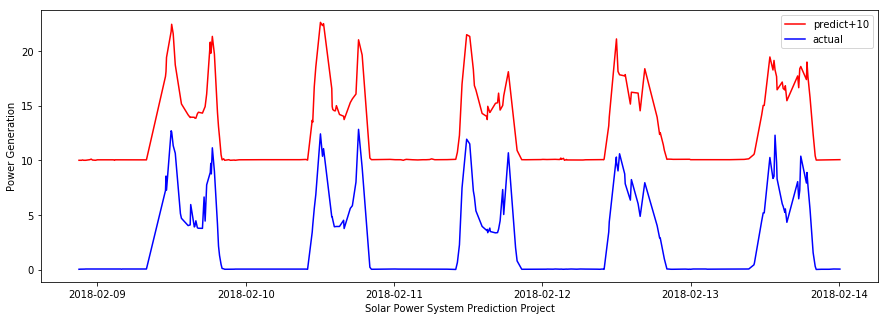

In [47]:
Test_show['Time']=pd.to_datetime(Test_show['Time'])

def atleast0(x):
    if x<0:
        return 10
    else:
        return x+10

plt.figure(figsize=(15,5))
plt.plot(Test_show['Time'][500:800].values,Test_show['predictPowerGeneration'][500:800].apply(atleast0).values,c='r',label='predict+10')
plt.plot(Test_show['Time'][500:800].values,Test_show['actualPowerGeneration'][500:800].values,c='b',label='actual')
plt.ylabel('Power Generation')
plt.xlabel('Solar Power System Prediction Project')
plt.legend()
plt.show()

In [39]:
from sklearn.externals import joblib

_ = joblib.dump(myGBR, 'best_model_mse_1.pkl', compress=9)